Missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Confusion Matrix:
 [[70  1]
 [ 3 40]]


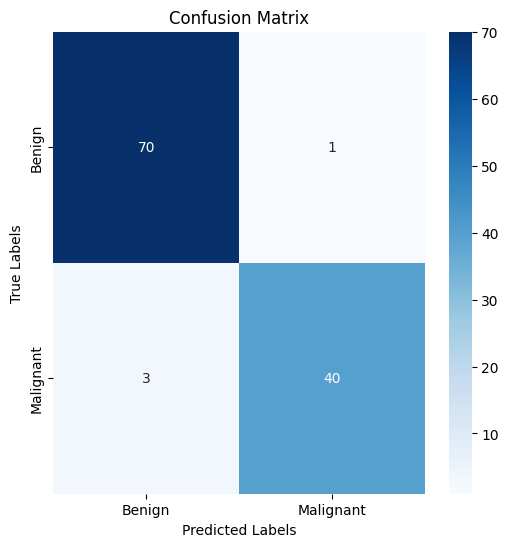


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Loading and Cleaning
data = pd.read_csv('/content/BreastCancer.csv')  # Adjust the path if needed

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Select numeric columns only for further processing
numeric_data = data.select_dtypes(include=np.number)

# Check for infinite values in numeric columns
print("\nInfinite values:\n", np.isinf(numeric_data).sum())

# Replace infinite values with NaN in numeric columns
numeric_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Update the original DataFrame with the modified numeric columns
data[numeric_data.columns] = numeric_data

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
numeric_features = data.select_dtypes(include=np.number).columns
# Removing 'Unnamed: 32' from the difference as it's likely causing the mismatch
numeric_features = numeric_features.difference(['id', 'diagnosis', 'Unnamed: 32'])
imputed_data = imputer.fit_transform(data[numeric_features])
imputed_data_df = pd.DataFrame(imputed_data, columns=numeric_features)
data[numeric_features] = imputed_data_df

# 2. Feature Selection and Target Variable
X = data.drop(columns=['id', 'diagnosis'])
y = data['diagnosis'].map({'M': 1, 'B': 0})

# 3. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 6. Predictions
y_pred = model.predict(X_test)

# 7. Evaluation - Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualization of the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 8. Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))